# Filtrado Gaussiano

El filtrado gaussiano permite disminuir el ruido de una imágen a partir de la premisa que la información del pixel de interés se encuentra repartida en los pixeles vecinos y que además los vecinos más cercanos contienen más información que los vecinos lejanos. A lo largo de ésta práctica veremos como se genera un kernel Gaussiano y como aplica mediante la operación de convolución.

$$
G = H \star I
$$

Recordemos que la convolución se realiza a partir de la siguiente ecuación,

$$
	G[i,j] =  \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] I[i-u,j-v]
$$



('Esta imagen es de tipo:', <type 'numpy.ndarray'>, 'con dimensiones:', (512L, 512L))


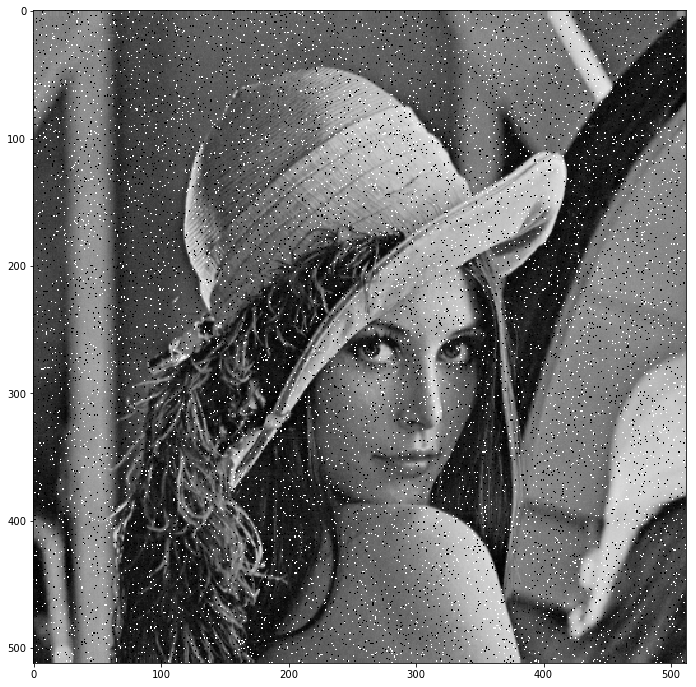

In [1]:
# paquetes necesarios
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline

# Leer la imagen con ruido de sal y pimienta
lenna_sp = mpimg.imread('lenna_sp.png')

# Desplegar información y graficar la imagen
print('Esta imagen es de tipo:', type(lenna_sp), 'con dimensiones:', lenna_sp.shape)

plt.figure(figsize=(12,12))
plt.imshow(lenna_sp, cmap = 'gray') 

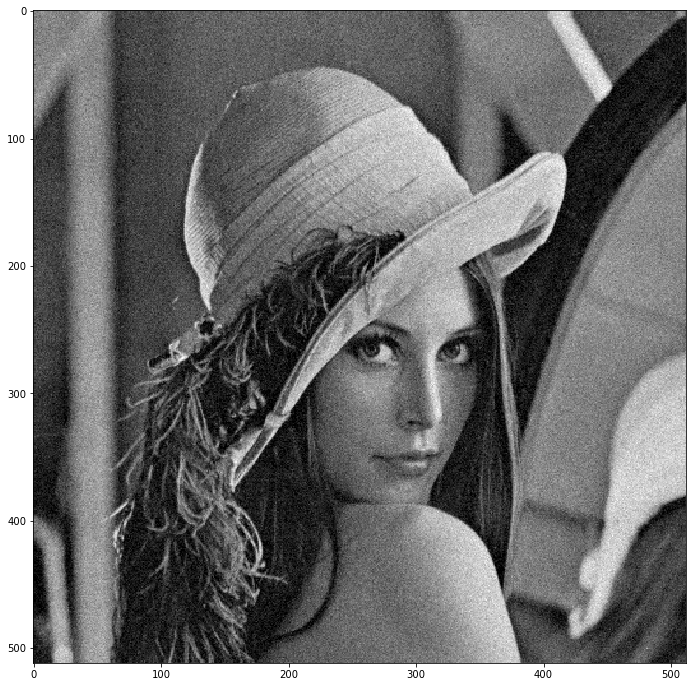

In [2]:
# Ahora mostraremos una imagen con ruido gaussiano
lenna_gn = mpimg.imread('lenna_gn.png')

plt.figure(figsize=(12,12))
plt.imshow(lenna_gn, cmap = 'gray') 

## Filtro de promedio

En este primer ejemplo utilizaremos un filtro 'media' o 'promedio' y realizaremos la convolución entre la imagen y el filtro.
$$
H (i,j) = \frac{1}{(2 k + 1)^2}
$$
Por ejemplo, si $k = 1$, entonces el filtro de media es:
\begin{equation}
H =
\begin{array}{|c|c|c|}
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ 
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ 
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
			\hline
\end{array}
\end{equation}

[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


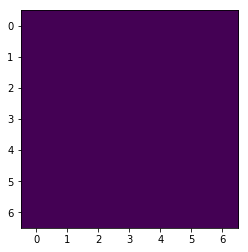

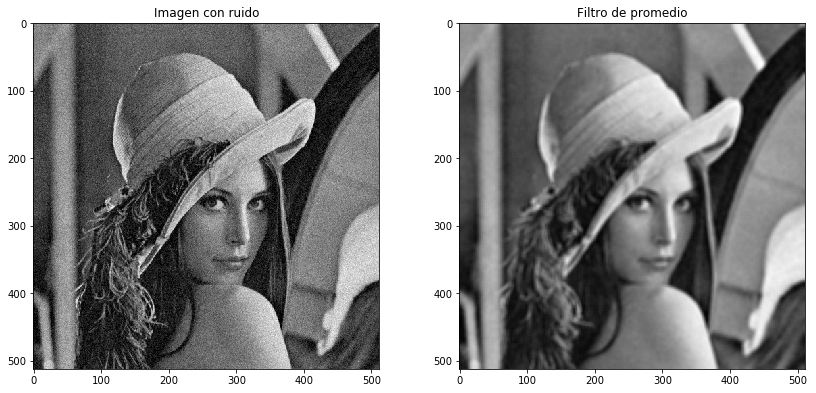

In [6]:
# Definir kernel (filtro)
k = 3
tamano = 2 * k + 1
# RESOLVER
kernel = np.ones((tamano, tamano), np.float32) / (tamano**2)

print(kernel)
# imprimir el filtro
plt.imshow(kernel)
plt.show()

# RESOLVER
# Operación de convolución 2D entre el filtro y la imagen
# TIP: usa la función filter 2D de OpenCV
img_filtrada = cv2.filter2D(lenna_gn, -1, kernel)

# plot with various axes scales
plt.figure(figsize=(14, 14))

plt.subplot(221)
plt.imshow(lenna_gn, cmap = 'gray')
plt.title('Imagen con ruido')

plt.subplot(222)
plt.imshow(img_filtrada, cmap = 'gray')
plt.title('Filtro de promedio')

plt.show()

In [ ]:
# Ejercicio: 
# 1. Aplica el filtro de media a la imagen con ruido de sal y pimienta

## Kernel Gaussiano

A continuación generaremos un filtro Gaussiano de acuerdo a:

$$
H(x,y) = \frac{1}{2 \pi \sigma ^{2}} e^{- \frac{x^{2} + y^{2}}{2 \sigma ^{2}}}
$$

Utilizando la libreria scipy podemos calcular el valor de la función con:
```python
h = multivariate_normal.pdf([x,y], mean, cov)
```

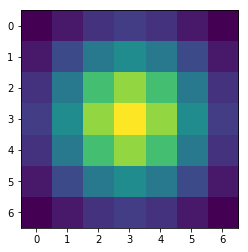

In [17]:
# Ejercicio
# 2. Genera un kernel gaussiano
# 3. Modifica los valores del filtro y observa los resultados

# definir el tamaño del nuevo filtro
k = 3
tamano = 2 * k + 1

# RESOLVER: Definir los parámetros de la función gaussiana 
mean = [0, 0]
cov = [[3,0],[0,3]]

# Ahora rellenamos el kernel
kernel_gaussiano = np.zeros((tamano,tamano), np.float32)

for i in range (tamano):
    for j in range (tamano):
        x = [-k + i, -k + j]
        w = multivariate_normal.pdf(x, mean, cov)
        kernel_gaussiano[i][j] = w

# imprimimos el kernel
plt.imshow(kernel_gaussiano)
plt.show()


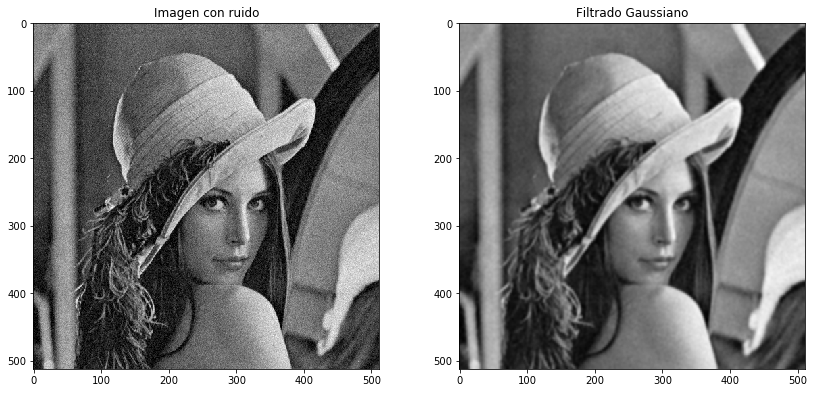

In [18]:
# RESOLVER: implementa el filtrado gaussiano
# Operación de convolución 2D entre el kernel que generamos y la imagen objetivo
img_difuminada = cv2.filter2D(lenna_gn, -1, kernel_gaussiano)

# plot with various axes scales
plt.figure(figsize=(14, 14))

plt.subplot(221)
plt.imshow(lenna_gn, cmap = 'gray')
plt.title('Imagen con ruido')

plt.subplot(222)
plt.imshow(img_difuminada, cmap = 'gray')
plt.title('Filtrado Gaussiano')

plt.show()

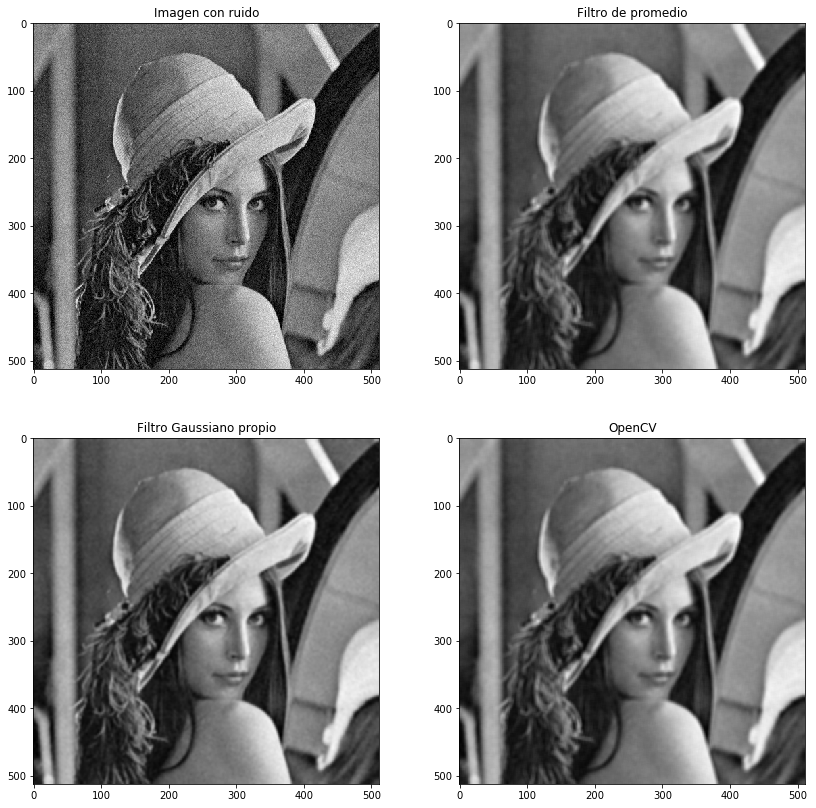

In [19]:
# OpenCV ya tiene implementado un filtro gaussiano
# Comparemos resultados

sigma = 5
size = 7
blur = cv2.GaussianBlur(lenna_gn, (size,size), sigma)

# plot with various axes scales
plt.figure(figsize=(14, 14))

plt.subplot(221)
plt.imshow(lenna_gn, cmap = 'gray')
plt.title('Imagen con ruido')

plt.subplot(222)
plt.imshow(img_filtrada, cmap = 'gray')
plt.title('Filtro de promedio')

plt.subplot(223)
plt.imshow(img_difuminada, cmap = 'gray')
plt.title('Filtro Gaussiano propio')

plt.subplot(224)
plt.imshow(blur, cmap = 'gray')
plt.title('OpenCV')

plt.show()

Al parecer no estamos obteniendo los mismos resultados.

Puedes modificar el filtro para obtener resultados similares?